In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import itertools

In [2]:
# read in plate boundaries file
with open('pb2002_plates.dig','r') as fid:
    raw = fid.readlines()

# get section break line numbers
idx = []
for ii,rr in enumerate(raw):
    if '***' in rr:
        idx.append(ii)

# split sections into dictionary of named plate boundaries
plates = {}
pidx = 0

for ii in idx:
    tmp = raw[pidx:ii]
    pidx = ii+1
    
    plates[tmp[0][:5]] = tmp[1:]

for key,val in plates.items():
    tmp = []
    for vv in val:
        tmp.append([float(i) for i in vv.strip('\n').split(',')])
    plates[key] = np.array(tmp)

In [3]:
# motion of point on Nazca plate wrt SA plate
earth_rad = 6371e5 # cm
site = [np.deg2rad(i) for i in [-76, -28]] # lon, lat (rads)
euler_pole = [np.deg2rad(i) for i in [-94, 56, 7.2e-7]] # lon, lat, vel. °/yr

In [4]:
# here you do math

vv = 7.98 # cm/yr
beta = np.deg2rad(80.02) # radians

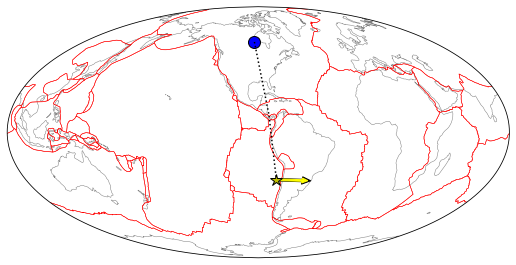

In [5]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide(central_longitude=-90))

ax.set_global()

ax.coastlines(linewidth=0.5,color='grey')

for key,val in plates.items():
    ax.plot(val[:,0],val[:,1],'-r',linewidth=0.5,transform=ccrs.Geodetic())
    
ax.plot(np.rad2deg(site[0]),np.rad2deg(site[1]),'*y',zorder=99,
        mec='black',markersize=12,transform=ccrs.PlateCarree())

ax.plot(np.rad2deg(euler_pole[0]),np.rad2deg(euler_pole[1]),'ob',
        mec='black',markersize=12,transform=ccrs.PlateCarree())

ax.plot(np.rad2deg([euler_pole[0],site[0]]),np.rad2deg([euler_pole[1],site[1]]),
        ':k',transform=ccrs.Geodetic()
       )

# draw arrow twice for black outline
ax.arrow(x=np.rad2deg(site[0]),y=np.rad2deg(site[1]),
         dx=20*np.sin(np.deg2rad(beta+90)),dy=20*np.cos(np.deg2rad(beta+90)),
         color='black',shape='full',width=1.5,
         zorder=19,transform=ccrs.PlateCarree()
        )

ax.arrow(x=np.rad2deg(site[0]),y=np.rad2deg(site[1]),
         dx=20*np.sin(np.deg2rad(beta+90)),dy=20*np.cos(np.deg2rad(beta+90)),
         color='yellow',shape='full',width=1,
         zorder=20,transform=ccrs.PlateCarree()
        )